In [1]:
!rm -rf sample_data
!test -d train || (curl -o train.zip https://zenodo.org/records/5849371/files/marmoset-dlc-2021-05-07.zip?download=1 && unzip -q train.zip -d ./train && rm -f train.zip)

In [2]:
!pip install ultralytics deeplabcut2yolo

In [3]:
import deeplabcut2yolo as d2y

json_path = "./train/marmoset-dlc-2021-05-07/training-datasets/iteration-0/UnaugmentedDataSet_marmosetMay7/dlc_shuffle1_train.json"
csv_path = "./train/marmoset-dlc-2021-05-07/training-datasets/iteration-0/UnaugmentedDataSet_marmosetMay7/CollectedData_dlc.csv"
root_dir = "./train/marmoset-dlc-2021-05-07/labeled-data/"

d2y.convert(json_path, csv_path, root_dir, datapoint_classes=[0, 1], n_keypoint_per_datapoint=30, precision=6)

In [4]:
def create_data_yml(train_path, val_path, kpt_shape, flip_idx, nc, names, output_path):
  data = {
    "train": train_path,
    "val": val_path,
    "kpt_shape": kpt_shape,
    "flip_idx": flip_idx,
    "nc": nc,
    "names": names
  }

  with open(output_path, "w") as f:
    import yaml
    yaml.dump(data, f, default_flow_style=None, sort_keys=False)

In [5]:
train_path = "/content/train/marmoset-dlc-2021-05-07/labeled-data/reachingvideo1"
val_path = "/content/train/marmoset-dlc-2021-05-07/labeled-data/refinement1"
data_path = "/content/data.yml"
shape = [15, 3]
flip_index = [0, 3, 2, 1, 6, 7, 4, 5, 9, 8, 11, 10, 12, 13, 14]
nc = 2
names = ["B", "W"]

create_data_yml(train_path, val_path, shape, flip_index, nc, names, data_path)

In [6]:
from ultralytics import YOLO

model = YOLO("yolov8n-pose.pt").load('yolov8n-pose.pt')
model.train(data="data.yml", epochs=5, imgsz=640)

100%|██████████| 6.52M/6.52M [00:00<00:00, 109MB/s]


Transferred 397/397 items from pretrained weights
Ultralytics YOLOv8.2.87 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=pose, mode=train, model=yolov8n-pose.pt, data=data.yml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=yolov8n-pose.pt, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=F

100%|██████████| 755k/755k [00:00<00:00, 20.8MB/s]


Overriding model.yaml kpt_shape=[17, 3] with kpt_shape=[15, 3]
Overriding model.yaml nc=1 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True

100%|██████████| 6.25M/6.25M [00:00<00:00, 106MB/s]


AMP: checks passed ✅


train: Scanning /content/train/marmoset-dlc-2021-05-07/labeled-data/reachingvideo1... 3638 images, 1254 backgrounds, 0 corrupt: 100%|██████████| 4892/4892 [00:05<00:00, 898.49it/s] 


train: New cache created: /content/train/marmoset-dlc-2021-05-07/labeled-data/reachingvideo1.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/train/marmoset-dlc-2021-05-07/labeled-data/refinement1... 326 images, 98 backgrounds, 0 corrupt: 100%|██████████| 424/424 [00:01<00:00, 417.68it/s]

val: New cache created: /content/train/marmoset-dlc-2021-05-07/labeled-data/refinement1.cache


Plotting labels to runs/pose/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 63 weight(decay=0.0), 73 weight(decay=0.0005), 72 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/pose/train
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


        1/5      2.61G      1.601      10.49     0.6464      2.506      1.548         14        640: 100%|██████████| 306/306 [02:07<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.14it/s]


                   all        424        652      0.247      0.528      0.239     0.0983          0          0          0          0

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


        2/5      2.29G      1.545      9.284     0.5823      1.869      1.447         15        640: 100%|██████████| 306/306 [02:00<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.58it/s]

                   all        424        652      0.251      0.488      0.226     0.0891          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


        3/5      2.28G      1.481      8.825     0.5673      1.738      1.404         11        640: 100%|██████████| 306/306 [01:56<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.27it/s]

                   all        424        652      0.253       0.61      0.258      0.117    0.00189    0.00153   0.000102   1.61e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


        4/5      2.28G      1.404      8.481     0.5458      1.617      1.355         20        640: 100%|██████████| 306/306 [01:58<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.30it/s]

                   all        424        652      0.277       0.61      0.273      0.133    0.00291    0.00613   0.000229   2.29e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


        5/5      2.28G      1.288      8.177     0.5343       1.49      1.282         16        640: 100%|██████████| 306/306 [01:58<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.05it/s]

                   all        424        652      0.294      0.691      0.297      0.154   0.000983    0.00307   0.000167   1.67e-05



5 epochs completed in 0.181 hours.
Optimizer stripped from runs/pose/train/weights/last.pt, 6.7MB
Optimizer stripped from runs/pose/train/weights/best.pt, 6.7MB

Validating runs/pose/train/weights/best.pt...
Ultralytics YOLOv8.2.87 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-pose summary (fused): 187 layers, 3,248,633 parameters, 0 gradients, 9.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.51it/s]


                   all        424        652      0.293      0.689      0.296      0.154   0.000982    0.00307   0.000167   1.67e-05
                     B        326        326      0.315      0.623      0.284      0.146    0.00196    0.00613   0.000223   2.23e-05
                     W        326        326      0.271      0.755      0.308      0.161          0          0    0.00011    1.1e-05
Speed: 0.3ms preprocess, 2.9ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to runs/pose/train


ultralytics.utils.metrics.PoseMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b5c8f8cd660>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(P)', 'F1-Confidence(P)', 'Precision-Confidence(P)', 'Recall-Confidence(P)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041, 

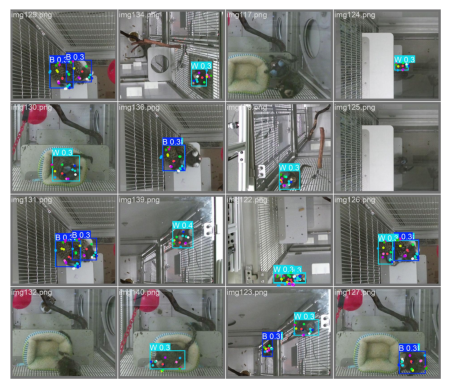

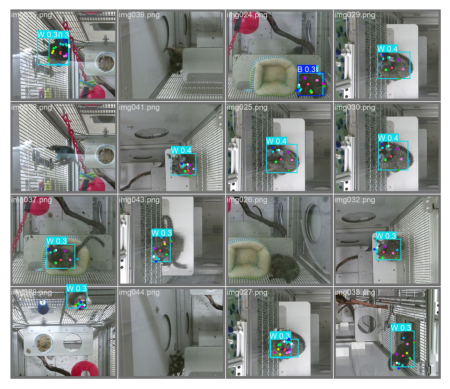

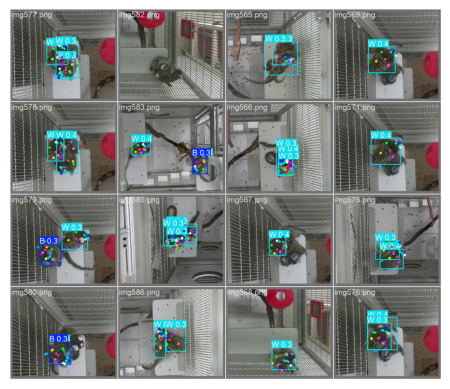

In [7]:
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt

image_paths = glob('/content/runs/pose/train/val_batch*_pred.jpg')

for image_path in image_paths:
    image = Image.open(image_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()